In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## Using Spotify API

In [2]:
from test import get_user, get_playlist

# top_songs = get_top_songs('jpamukci')

In [3]:
# character_playlists = {
#   'Barney Stinson':'4ijJSfRKLOKSLt51BIVYww',
#  'Lily Aldrin':'6WxgJcRxkbrt2WirsLThdx',
#  'Marshall Eriksen':'5jC1gE2GONlxxTklA1yrli',
#  'Ted Mosby':'4xqZaffOV5vOimwYkyVDBQ',
#  'Robin Scherbatsky':'1knbJqNe7AvXf40k0kQoPR',
#  'Joey Tribbiani':'6SrWIhbOFX7Ljsuwp10Vlk',
#  'Rachel Green':'2fR7rHp5c5SLyTwQZaHdp2',
#  'Ross Geller':'37i9dQZF1DZ06evO0ZOciQ',
#  'Monica Geller':'2qWKM9p7f2mQoM4IrDVwUC',
#  'Chandler Bing':'45cXXST8qN5ECUNvemRykM',
#  'Phoebe Buffay':'37i9dQZF1DZ06evO0N5yhI',
#  'Michael Scott':'0YKfXGKGWa6WVloCH53ADz',
#  'Dwight Schrute':'7eNaWx2iiEILG0RwYtBZFN',
#  'Jim Halpert':'7bVvZbnKXTUH8LpLRJBMF4',
#  'Pam Beesly':'7BrJu8s4jsdWw1ewjWc2sk',
#  'Kelly Kapoor':'5brcpUDptGytuexzlQrzs8'
#  }

# for key, value in character_playlists.items():
#     char_df = get_playlist(value)
#     char_df.to_csv(f'./character_datasets/{key.replace(" ", "_")}.csv')
#     print(key)

In [4]:
# consolidate_characters = pd.DataFrame(consolidated_character_vectors).iloc[:, 1:]

In [5]:
jay_music = get_user('jay.sakarvadia')

In [6]:
jay_music.reset_index(inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

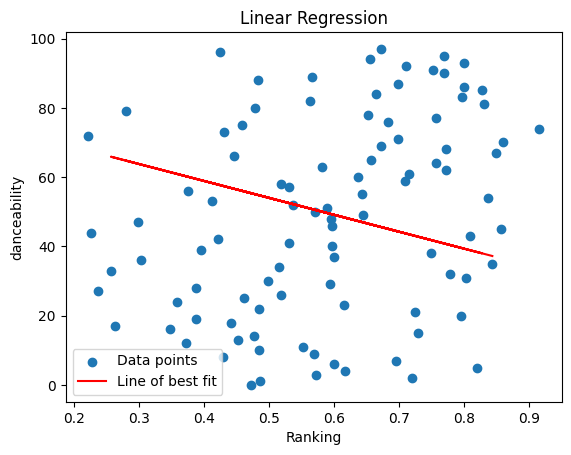

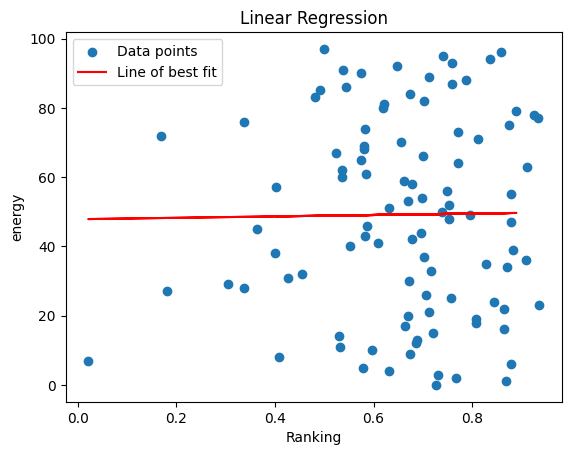

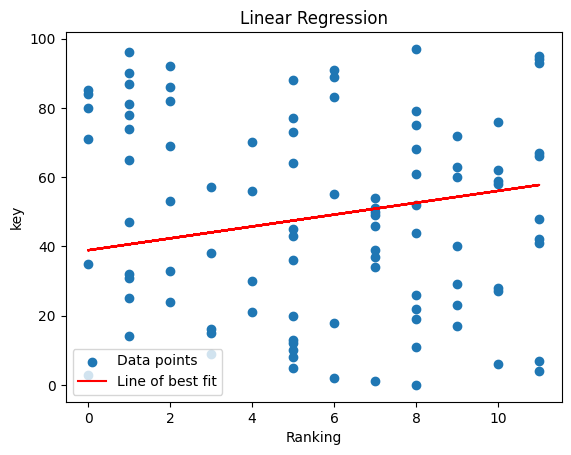

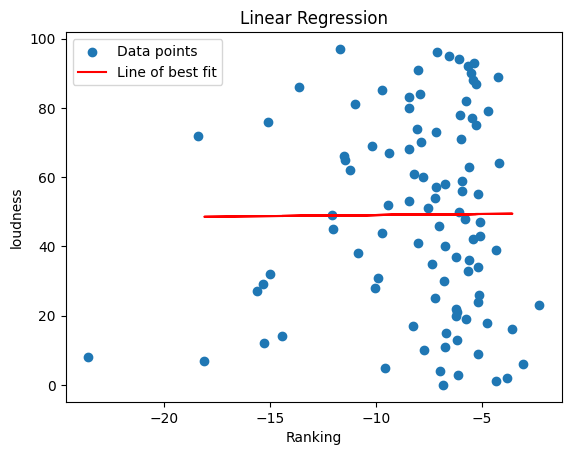

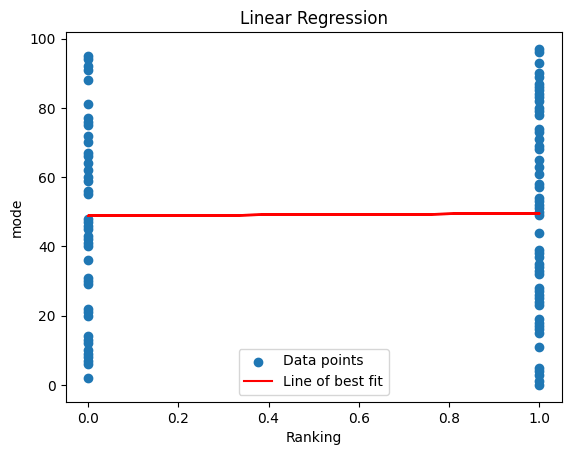

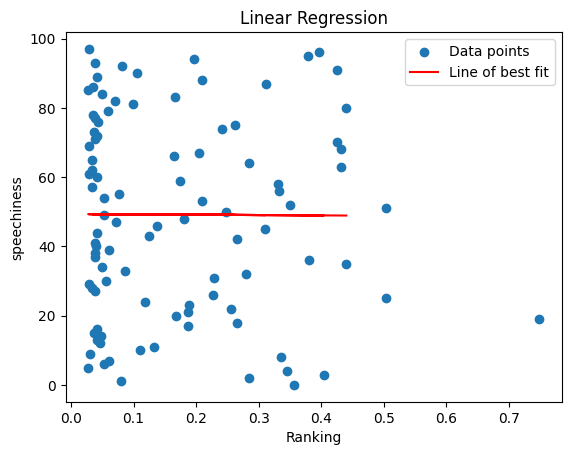

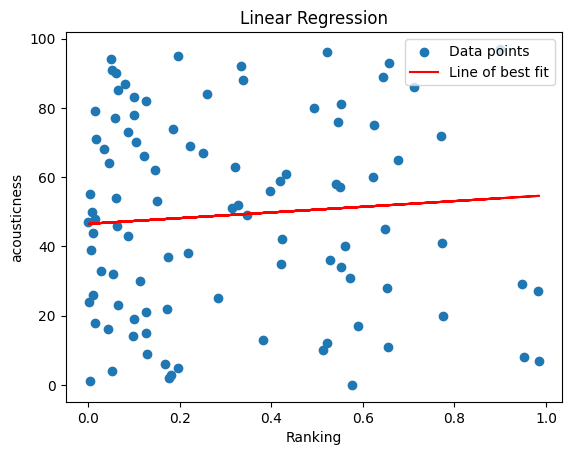

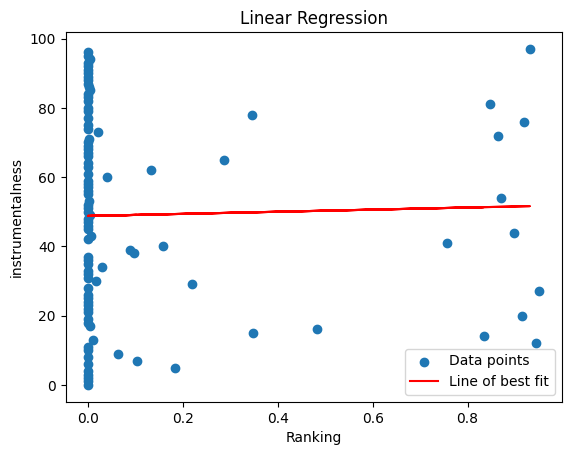

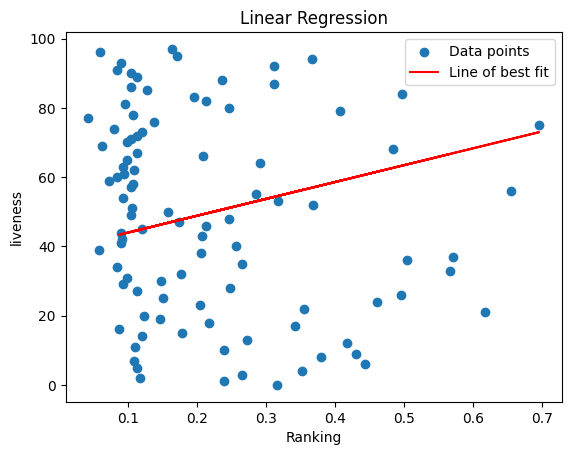

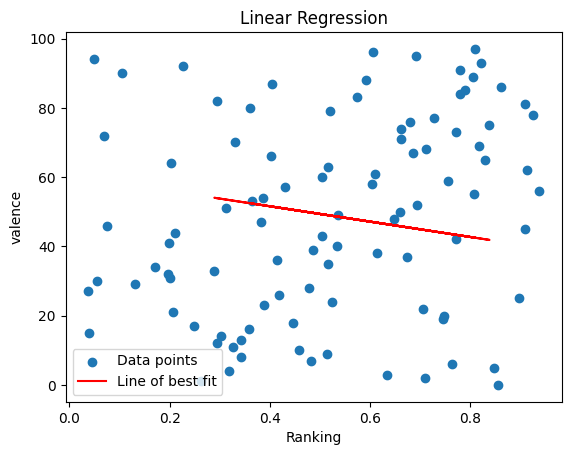

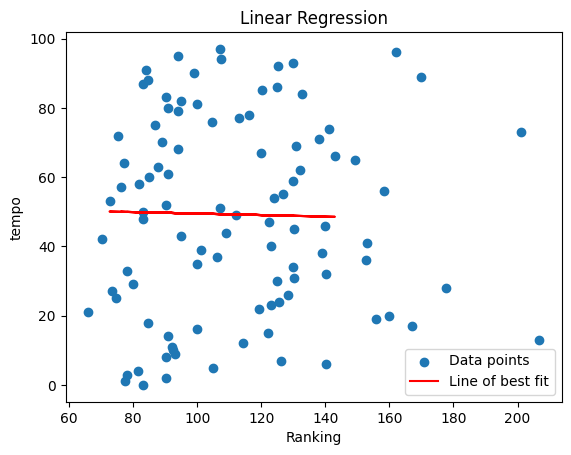

In [26]:

key_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
r2 = []

for feature in key_features:
    X = jay_music[feature]
    y = jay_music['index']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()

    X_train = np.array(X_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)  

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    r2.append(r2_score(y_test, y_pred))

    # Rankings are reversed as we want lower values up top
    X_reverse = X[::-1]

    plt.scatter(X_reverse, y, label='Data points')
    plt.plot(X_test, y_pred, color='red', label='Line of best fit')
    plt.xlabel('Ranking')
    plt.ylabel(feature)
    plt.legend()
    plt.title('Linear Regression')
    plt.show()

r2_comb = {key: abs(value) for key, value in zip(key_features, r2)}
strong_features = dict(sorted(r2_comb.items(), key=lambda item: item[1], reverse=True))

In [9]:
top3_features = list(strong_features.keys())[:3]

In [10]:
top3_features

['key', 'liveness', 'valence']

In [11]:
user_point = jay_music[top3_features].mean()

import os
import pandas as pd
# from consolidated_feature_vector import consolidate_features

directory_path = './character_datasets'
top3_characters = []

for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    char_df = pd.read_csv(file_path)
    char_df = char_df[top3_features].mean()
    char_df['Character'] = filename.replace("_", " ").replace(".csv", "")
    # print(char_df.head())
    top3_characters.append(char_df)

In [12]:
import math

def get_distance(point1, point2, top3):
    return math.sqrt((point1[top3[0]] - point2[top3[0]])**2 + (point1[top3[1]] - point2[top3[1]])**2 + (point1[top3[2]] - point2[top3[2]])**2)

In [13]:
comparison = pd.DataFrame(top3_characters)
comparison['distance'] = comparison.apply(lambda x: get_distance(x, user_point, top3_features), axis=1)
comparison['percentage'] = (comparison['distance'].max() - comparison['distance']) / comparison['distance'].max()

In [27]:
vizy = comparison.sort_values('distance', ascending=True)

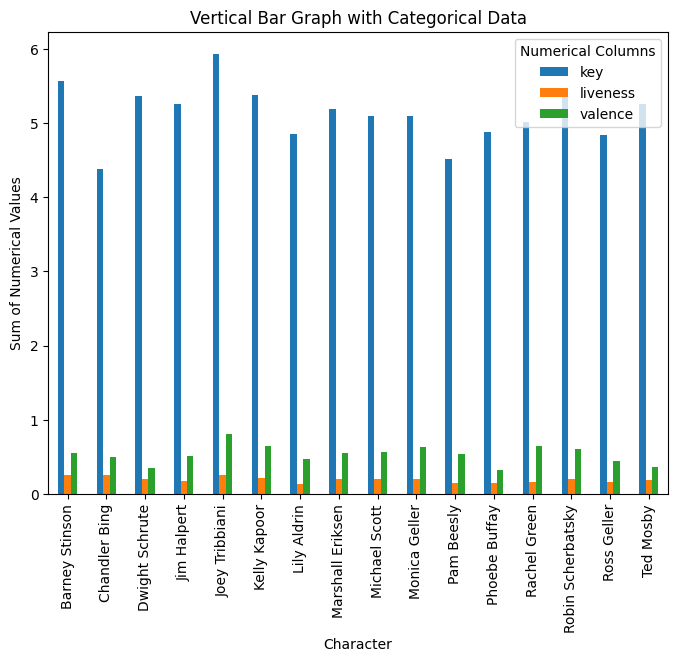

In [31]:
grouped = vizy.groupby('Character')[[top3_features[0], top3_features[1], top3_features[2]]].sum()
ax = grouped.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Character')
plt.ylabel('Sum of Numerical Values')
plt.title('Vertical Bar Graph with Categorical Data')

# Add legend
plt.legend(title='Numerical Columns')

In [ ]:
plt.figure(figsize=(12, 7))
plt.bar(jay_music_consolidated_data_bargraph['Character'], jay_music_consolidated_data_bargraph['Value'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.ylabel('Value (Log Scale)')
plt.title('Attributes Value Bar Graph with Logarithmic Y-axis')
plt.tight_layout()
plt.show()


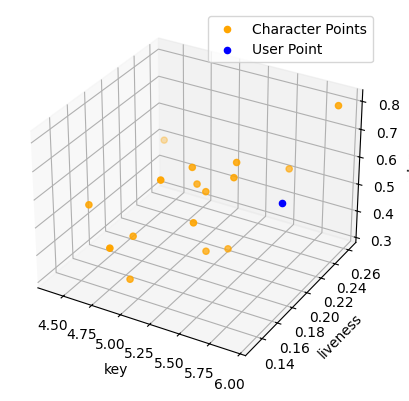

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = comparison[top3_features[0]]
y = comparison[top3_features[1]]
z = comparison[top3_features[2]]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='orange', label='Character Points')

ax.scatter(user_point[top3_features[0]], 
           user_point[top3_features[1]],
           user_point[top3_features[2]],
           c='blue', label='User Point')

ax.set_xlabel(top3_features[0])
ax.set_ylabel(top3_features[1])
ax.set_zlabel(top3_features[2])

ax.legend()
plt.show()


In [15]:
import matplotlib.pyplot as plt